In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_recommenders as tfrs
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Read

In [ ]:
# Memuat dataset
kendaraan_df = pd.read_excel('/content/drive/MyDrive/Capstone/dataset/DATASET KENDARAAN.xlsx')
pemilik_df = pd.read_excel('/content/drive/MyDrive/Capstone/dataset/DATASET PEMILIK KENDARAAN.xlsx')
ulasan_df = pd.read_excel('/content/drive/MyDrive/Capstone/dataset/DATASET ULASAN_REV.xlsx')
pengguna_df = pd.read_excel('/content/drive/MyDrive/Capstone/dataset/DATASET PENGGUNA.xlsx')
transaksi_df = pd.read_excel('/content/drive/MyDrive/Capstone/dataset/DATASET RIWAYAT TRANSAKSI.xlsx')

## Dataset Kendaraan

In [ ]:
kendaraan_df

,id_pemilik,jenis_kendaraan,id_kendaraan,merk_kendaraan,Transmisi,harga_per_hari,kapasitas
0,1001,mobil,MB1001A001,toyota alphard transformer,Automatic,2750000,5
1,1001,mobil,MB1001A005,toyota fortuner vrz,Automatic,1300000,7
2,1001,mobil,MB1001A008,toyota hiace premio,Automatic,1150000,14
3,1001,mobil,MB1001A000,toyota avanza,Automatic,500000,6
4,1001,mobil,MB1001A002,daihatsu xenia,Automatic,500000,6
...,...,...,...,...,...,...,...
274,1021,motor,MT1021A061,honda vario,Automatic,70000,2
275,1021,motor,MT1021A042,honda scoopy,Automatic,80000,2
276,1021,motor,MT1021A043,honda vario 125,Automatic,80000,2
277,1021,motor,MT1021A044,yamaha nmax 155,Automatic,120000,2


In [ ]:
kendaraan_df.describe ()

,id_pemilik,harga_per_hari,kapasitas
count,279.000000,2.790000e+02,279.000000
mean,1010.501792,5.598925e+05,7.677419
std,6.405300,5.651717e+05,5.463077
min,1001.000000,5.000000e+04,2.000000
25%,1005.000000,2.500000e+05,5.000000
50%,1010.000000,4.000000e+05,7.000000
75%,1016.000000,7.000000e+05,8.000000
max,1021.000000,4.000000e+06,50.000000


## Dataset Pemilik Kendaraan

In [ ]:
pemilik_df

,id_pemilik,nama_pemilik,alamat_pemilik,Usia,nmr_tlp_pemilik,email_pemilik
0,1001,almoreno,"Jl. Pasarkembang, Stasiun Tugu, Yogyakarta 55272",30,82133345351,almorenotransport@gmail.com
1,1002,Giral,"jl. Imogiri timur 200B RT 033 RW 011 giwangan,...",28,82744340808,order.globaltransport@gmail.com
2,1003,novie,"jl. Pundatewa, mantup, baturetno, kec.bangunta...",25,81328374849,malioborotour.info@gmail.com
3,1004,fetra transport,yogyakarta,32,81223355700,fetra@gmail.com
4,1005,ada kawan transport,yogyakarta,27,8122730707,adakawan@gmail.com
5,1006,abdi transport,yogyakarta,35,8122808844,abdi@gmail.com
6,1007,akar transpot,yogyakarta,28,816687447,akar@gmail.com
7,1008,nice tour,yogyakarta,29,81282002003,nicetour@gmail.com
8,1009,abadi transport,yogyakarta,31,85102613727,abadi@gmail.com
9,1010,alvian trans,yogyakarta,23,82326605264,alvian@gmail.com


## Dataset Ulasan

In [ ]:
ulasan_df

,id_ulasan,id_pemilik,id_kendaraan,id_pengguna,nama,tanggal,rating,ulasan,status,harga,kapasitas
0,U001,1001,MB1001A004,R01,Budi Santoso,22/05/2023,5,Pelayanan sangat baik dan mobil dalam kondisi ...,Selesai,700000,7
1,U002,1001,MB1001A001,R01,Budi Santoso,25/05/2023,4,Mobil nyaman dan bersih,Selesai,2750000,5
2,U003,1001,MB1001A005,R01,Budi Santoso,26/05/2023,5,Pelayanan prima,Selesai,1300000,7
3,U004,1001,MB1001A008,R01,Budi Santoso,27/05/2023,3,Mobil luas dan nyaman,Selesai,1150000,14
4,U005,1002,MB1002A004,R01,Budi Santoso,28/05/2023,5,Sangat memuaskan,Selesai,450000,8
...,...,...,...,...,...,...,...,...,...,...,...
3395,U3396,1020,MB1020A020,R300,Agus Nugroho,16/05/2023,5,Mobil sangat nyaman,Selesai,"Rp700,000.00",6
3396,U3397,1017,MB1017A038,R300,Agus Nugroho,17/05/2023,3,Pelayanan kurang memuaskan,Selesai,"Rp500,000.00",8
3397,U3398,1007,MB1007M038,R300,Agus Nugroho,18/05/2023,4,Mobil dalam kondisi baik,Selesai,"Rp500,000.00",8
3398,U3399,1020,MB1020A001,R300,Agus Nugroho,19/05/2023,2,Mobil kurang bersih,Selesai,"Rp3,000,000.00",6


In [ ]:
ulasan_df.describe()

,id_pemilik,rating,kapasitas
count,3400.000000,3400.000000,3400.000000
mean,1011.972647,3.455588,7.212353
std,6.651729,1.208396,4.601530
min,1001.000000,1.000000,2.000000
25%,1007.000000,3.000000,5.000000
50%,1012.000000,4.000000,7.000000
75%,1019.000000,4.000000,8.000000
max,1021.000000,5.000000,50.000000


## Dataset Pengguna

In [ ]:
pengguna_df

,renter_id,name,age,gender,address,phone_number,email,rental_history
0,R01,Budi Santoso,34,Laki-laki,Jakarta,81234567890,budi.santoso@gmail.com,MB1001A000
1,R02,Siti Aisyah,28,Perempuan,Bandung,82345678901,siti.aisyah@yahoo.com,MB1001A001
2,R03,Agus Prayitno,45,Laki-laki,Surabaya,83456789012,agus.prayitno@hotmail.com,MB1001A002
3,R04,Dinda Pertiwi,22,Perempuan,Yogyakarta,84567890123,dinda.pertiwi@outlook.com,MB1001A003
4,R05,Andi Setiawan,39,Laki-laki,Medan,85678901234,andi.setiawan@gmail.com,MB1001A004
...,...,...,...,...,...,...,...,...
295,R296,Dewi Susanti,36,Perempuan,Semarang,81604567895,dewi.susanti@yahoo.com,BS1020A009
296,R297,Dian Rahmawati,27,Perempuan,Malang,81714567896,dian.rahmawati@hotmail.com,BS1020A009
297,R298,Dewi Kurniawan,32,Perempuan,Denpasar,81824567897,dewi.kurniawan@gmail.com,BS1020A009
298,R299,Susi Prasetyo,34,Perempuan,Makassar,81934567898,susi.prasetyo@gmail.com,BS1020A009


## Dataset Riwayat Transaksi

In [ ]:
transaksi_df

,id_transaksi,id_pemilik,id_pengguna,tanggal_sewa,tanggal_kembali,durasi_sewa,harga,total_sewa,metode_pembayaran
0,T001,1001,R01,2024-01-01,2024-01-02,1,500000,500000,tunai
1,T002,1001,R02,2023-01-01,2023-01-03,2,2750000,5500000,kartu kredit
2,T003,1001,R03,2023-01-05,2023-01-08,3,500000,1500000,transfer bank
3,T004,1001,R04,2023-01-12,2023-01-15,3,500000,1500000,transfer bank
4,T005,1001,R05,2023-01-20,2023-01-25,5,700000,3500000,transfer bank
...,...,...,...,...,...,...,...,...,...
295,T296,1020,R296,2023-06-18,2023-06-22,4,1000000,4000000,kartu kredit
296,T297,1020,R297,2023-06-25,2023-06-30,5,1200000,6000000,kartu kredit
297,T298,1020,R298,2023-07-01,2023-07-05,4,1200000,4800000,kartu kredit
298,T299,1020,R299,2023-07-10,2023-07-15,5,1200000,6000000,kartu kredit


# Exploratory Data Analysis

In [ ]:
import pandas as pd

# Menampilkan beberapa baris pertama dari dataset
print("Dataset sebelum konversi tanggal:")
print(ulasan_df.head())

# Konversi kolom 'tanggal' ke format timestamp
ulasan_df['tanggal'] = pd.to_datetime(ulasan_df['tanggal'], format='%d/%m/%Y')

# Menampilkan beberapa baris pertama dari dataset setelah konversi
print("Dataset setelah konversi tanggal:")
print(ulasan_df.head())

# Menyimpan dataset yang sudah dikonversi ke bentuk baru jika diperlukan
ulasan_df.to_excel('/content/drive/MyDrive/Capstone/dataset/DATASET_ULASAN_UPDATED.xlsx', index=False)


Dataset sebelum konversi tanggal:
  id_ulasan  id_pemilik id_kendaraan id_pengguna          nama     tanggal  \
0      U001        1001   MB1001A004         R01  Budi Santoso  22/05/2023   
1      U002        1001   MB1001A001         R01  Budi Santoso  25/05/2023   
2      U003        1001   MB1001A005         R01  Budi Santoso  26/05/2023   
3      U004        1001   MB1001A008         R01  Budi Santoso  27/05/2023   
4      U005        1002   MB1002A004         R01  Budi Santoso  28/05/2023   

   rating                                             ulasan   status  \
0       5  Pelayanan sangat baik dan mobil dalam kondisi ...  Selesai   
1       4                            Mobil nyaman dan bersih  Selesai   
2       5                                    Pelayanan prima  Selesai   
3       3                              Mobil luas dan nyaman  Selesai   
4       5                                   Sangat memuaskan  Selesai   

     harga  kapasitas  
0   700000          7  
1  2750000

In [ ]:
ulasan_df.describe()

,id_pemilik,tanggal,rating,kapasitas
count,3400.000000,3400,3400.000000,3400.000000
mean,1011.972647,2023-11-18 08:15:06.352941056,3.455588,7.212353
min,1001.000000,2023-01-01 00:00:00,1.000000,2.000000
25%,1007.000000,2023-06-15 00:00:00,3.000000,5.000000
50%,1012.000000,2023-10-07 00:00:00,4.000000,7.000000
75%,1019.000000,2024-04-03 00:00:00,4.000000,8.000000
max,1021.000000,2027-08-24 00:00:00,5.000000,50.000000
std,6.651729,NaN,1.208396,4.601530


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Menampilkan informasi
print("Jumlah Ratings: {:,}".format(ulasan_df.shape[0]))
print("Jenis Kolom Yang Tersedia: {}".format(np.array2string(ulasan_df.columns.values)))
print("Jumlah User: {:,}".format(len(ulasan_df.id_pengguna.unique())))
print("Jumlah Pemilik: {:,}".format(len(ulasan_df.id_pemilik.unique())))
print("Jumlah Kendaraan: {:,}".format(len(ulasan_df.id_kendaraan.unique())))

Jumlah Ratings: 3,400
Jenis Kolom Yang Tersedia: ['id_ulasan' 'id_pemilik' 'id_kendaraan' 'id_pengguna' 'nama' 'tanggal'
 'rating' 'ulasan' 'status' 'harga' 'kapasitas']
Jumlah User: 300
Jumlah Pemilik: 21
Jumlah Kendaraan: 256


<ipython-input-7-cabe39430410>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_by_date.timestamp = pd.to_datetime(ulasan_df.tanggal, unit="s")


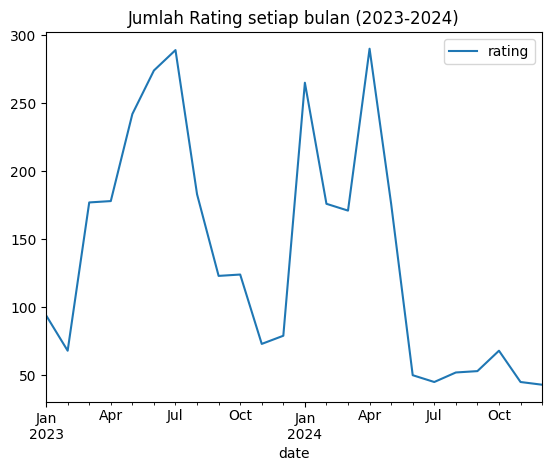

In [ ]:
data_by_date = ulasan_df.copy()
data_by_date.timestamp = pd.to_datetime(ulasan_df.tanggal, unit="s")
data_by_date = data_by_date.sort_values(by="tanggal", ascending=False).reset_index(drop=True)

data_by_date["year"] = data_by_date.tanggal.dt.year
data_by_date["month"] = data_by_date.tanggal.dt.month
rating_by_year = data_by_date.groupby(["year", "month"])["rating"].count().reset_index()
rating_by_year["date"] = pd.to_datetime(rating_by_year["year"].astype("str") + "-" + rating_by_year["month"].astype("str") + "-1")


# Filter data berdasarkan tahun 2023 dan 2024
rating_by_year_filtered = rating_by_year[(rating_by_year["year"].isin([2023, 2024]))]

# Plot grafik
rating_by_year_filtered.plot(x="date", y="rating")
plt.title("Jumlah Rating setiap bulan (2023-2024)")
plt.show()


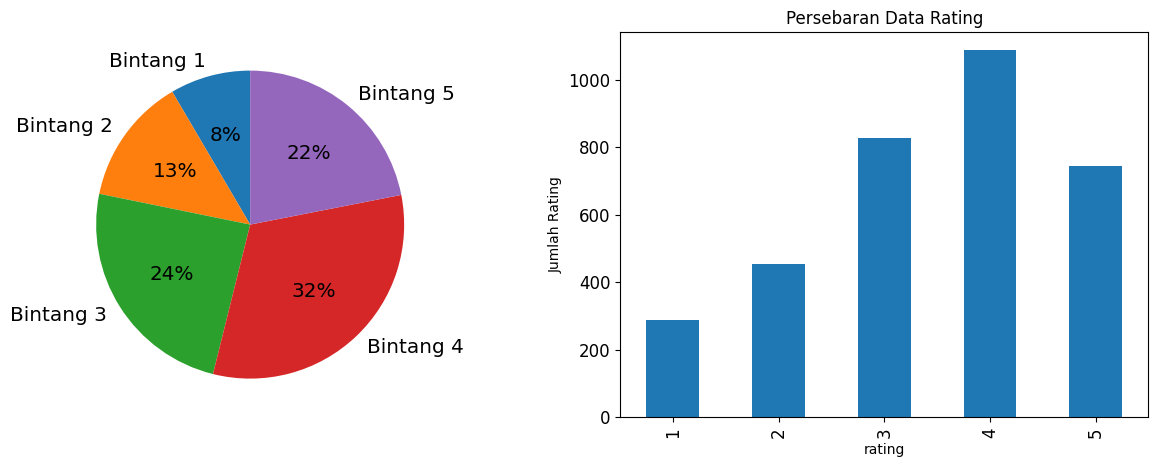

In [ ]:

import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan rating
ratings = ulasan_df.groupby("rating").agg({"rating": "count"})

# Membuat subplots
figsize = (15, 5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

# Plot pie chart
ratings.plot.pie(ax=ax1, y="rating", legend=False, autopct='%1.f%%', startangle=90, fontsize="x-large",
                 labels=["Bintang 1", "Bintang 2", "Bintang 3", "Bintang 4", "Bintang 5"])
ax1.set_ylabel('')

# Plot bar chart
ratings.plot.bar(ax=ax2, fontsize="large")
ax2.set(ylabel="Jumlah Rating")
ax2.set(title="Persebaran Data Rating")
ax2.get_legend().remove()

plt.show()


In [ ]:
# Mengelompokkan data berdasarkan rating
rating_by_product = ulasan_df.groupby("id_kendaraan").agg({"id_pengguna": "count", "rating": "mean"}).rename(
    columns={"id_pengguna": "Jumlah Rating", "rating": "Rata-rata Rating"}).reset_index()

# Menampilkan produk teratas berdasarkan jumlah rating
print("Produk teratas berdasarkan jumlah rating:")
print(rating_by_product.sort_values(by="Jumlah Rating", ascending=False).reset_index(drop=True).head())


Produk teratas berdasarkan jumlah rating:
  id_kendaraan  Jumlah Rating  Rata-rata Rating
0   MB1020A058             48          3.791667
1   MB1009M034             46          3.369565
2   MB1017M019             46          3.413043
3   MB1017M038             46          3.869565
4   MB1001M007             39          2.461538


# Model

In [ ]:
!pip install -q tensorflow-recommenders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Hanya menyimpan kolom yang relevan
relevant_columns = ['id_ulasan', 'id_pemilik', 'id_kendaraan', 'id_pengguna', 'rating']
recent_prod = ulasan_df[relevant_columns].copy()  # Membuat salinan DataFrame

# Mendapatkan ID pengguna, ID produk, dan ID pemilik yang unik
unique_userIds = recent_prod['id_pengguna'].astype(str).unique()
unique_productIds = recent_prod['id_kendaraan'].astype(str).unique()

# Membuat mapping dari id ke index
user_id_lookup = {id: idx for idx, id in enumerate(unique_userIds)}
product_id_lookup = {id: idx for idx, id in enumerate(unique_productIds)}

# Mengonversi kolom ID menjadi integer
recent_prod['id_pengguna'] = recent_prod['id_pengguna'].astype(str).map(user_id_lookup)
recent_prod['id_kendaraan'] = recent_prod['id_kendaraan'].astype(str).map(product_id_lookup)

# Normalisasi kolom rating
scaler = MinMaxScaler()
recent_prod['rating'] = scaler.fit_transform(recent_prod[['rating']])

# Membagi data menjadi data pelatihan dan pengujian
train, test = train_test_split(recent_prod, test_size=0.2, random_state=42)

# Membuat dataset TensorFlow dari data ulasan untuk pelatihan
train_dataset = tf.data.Dataset.from_tensor_slices({
    "id_pengguna": tf.cast(train['id_pengguna'].values, tf.int32),
    "id_kendaraan": tf.cast(train['id_kendaraan'].values, tf.int32),
    "rating": tf.cast(train['rating'].values, tf.float32)
})

# Membuat dataset TensorFlow dari data ulasan untuk pengujian
test_dataset = tf.data.Dataset.from_tensor_slices({
    "id_pengguna": tf.cast(test['id_pengguna'].values, tf.int32),
    "id_kendaraan": tf.cast(test['id_kendaraan'].values, tf.int32),
    "rating": tf.cast(test['rating'].values, tf.float32)
})

# Caching dan pembuatan batch untuk kedua dataset
cached_train = train_dataset.shuffle(100_000).batch(64).cache()
cached_test = test_dataset.batch(64).cache()

## Matrix Factorization Model

In [ ]:
class MatrixFactorizationModel(tf.keras.Model):
    def __init__(self, unique_userIds, unique_productIds, embedding_dim, regularization_rate=0.01):
        super().__init__()
        self.unique_userIds = unique_userIds
        self.unique_productIds = unique_productIds
        self.embedding_dim = embedding_dim
        self.regularization_rate = regularization_rate
        self.user_embeddings = tf.keras.layers.Embedding(len(unique_userIds), embedding_dim,
                                                         embeddings_regularizer=tf.keras.regularizers.l2(regularization_rate))
        self.product_embeddings = tf.keras.layers.Embedding(len(unique_productIds), embedding_dim,
                                                            embeddings_regularizer=tf.keras.regularizers.l2(regularization_rate))
        self.dense1 = tf.keras.layers.Dense(embedding_dim, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1)  # Ubah jumlah unit menjadi 1 (sesuai dengan label aktual)
        self.dropout = tf.keras.layers.Dropout(0.3)

    def call(self, user_id, product_id):
        user_embedding = self.user_embeddings(user_id)
        product_embedding = self.product_embeddings(product_id)
        dot_product = user_embedding * product_embedding
        x = self.dense1(dot_product)
        x = self.dense2(x)
        x = self.dropout(x)
        return tf.reduce_sum(x, axis=1)

    def get_config(self):
        config = super().get_config()
        config.update({
            "unique_userIds": self.unique_userIds,
            "unique_productIds": self.unique_productIds,
            "embedding_dim": self.embedding_dim,
            "regularization_rate": self.regularization_rate,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

class MyRentMFModel(tfrs.models.Model):
    def __init__(self, unique_userIds, unique_productIds, embedding_dim, regularization_rate=0.01):
        super().__init__()
        self.unique_userIds = unique_userIds
        self.unique_productIds = unique_productIds
        self.embedding_dim = embedding_dim
        self.regularization_rate = regularization_rate
        self.ranking_model = MatrixFactorizationModel(unique_userIds, unique_productIds, embedding_dim, regularization_rate)
        self.task = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
        )

    def compute_loss(self, features, training=False):
        rating_predictions = self.ranking_model(features["id_pengguna"], features["id_kendaraan"])
        return self.task(labels=features["rating"], predictions=rating_predictions)

    def call(self, features):
        return self.ranking_model(features["id_pengguna"], features["id_kendaraan"])

    def get_config(self):
        config = super().get_config()
        config.update({
            "unique_userIds": self.unique_userIds,
            "unique_productIds": self.unique_productIds,
            "embedding_dim": self.embedding_dim,
            "regularization_rate": self.regularization_rate,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Membuat model dengan kelas unik yang telah diperoleh
model = MyRentMFModel(unique_userIds, unique_productIds, embedding_dim, regularization_rate)

# Mengkompilasi dan melatih model dengan batch size yang lebih besar
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history = model.fit(cached_train, epochs=200, batch_size=batch_size, verbose=1, validation_data=cached_test)

# Mengevaluasi model pada data pengujian
evaluation = model.evaluate(cached_test, verbose=1)
print(f"RMSE on test data: {evaluation[1]}")
print(f"MAE on test data: {evaluation[2]}")

# Menghitung top-K accuracy
K = 10
user_ids_test = recent_prod['id_pengguna'].values
product_ids_test = recent_prod['id_kendaraan'].values
ratings_test = recent_prod['rating'].values

top_k_predictions = np.zeros((len(user_ids_test), K), dtype=np.int32)

for idx, user_id in enumerate(user_ids_test):
    user_id_tensor = tf.convert_to_tensor([user_id] * len(unique_productIds), dtype=tf.int32)
    product_id_tensor = tf.convert_to_tensor(list(range(len(unique_productIds))), dtype=tf.int32)
    predictions = model.ranking_model(user_id_tensor, product_id_tensor)

    top_k_product_indices = np.argsort(predictions.numpy().flatten())[-K:]
    top_k_predictions[idx] = top_k_product_indices

# Calculate top-K accuracy using NumPy
correct_count = np.sum(np.isin(product_ids_test, top_k_predictions))
top_k_accuracy = correct_count / len(product_ids_test)
print(f"Top-{K} Accuracy: {top_k_accuracy:.4f}")

# Save the model to a TensorFlow SavedModel format
dummy_input = {"id_pengguna": tf.constant([0]), "id_kendaraan": tf.constant([0])}
model(dummy_input)  # Panggil model pada data nyata untuk menentukan bentuk input
model.save('matrix_factorization_model', save_format='tf')


Epoch 1/200
43/43 [==============================] - 1s 13ms/step - root_mean_squared_error: 0.6498 - mean_absolute_error: 0.5806 - loss: 0.4214 - regularization_loss: 0.0220 - total_loss: 0.4434 - val_root_mean_squared_error: 0.6274 - val_mean_absolute_error: 0.5619 - val_loss: 0.3595 - val_regularization_loss: 0.0202 - val_total_loss: 0.3798
Epoch 2/200
43/43 [==============================] - 0s 9ms/step - root_mean_squared_error: 0.5772 - mean_absolute_error: 0.5112 - loss: 0.3322 - regularization_loss: 0.0187 - total_loss: 0.3509 - val_root_mean_squared_error: 0.5509 - val_mean_absolute_error: 0.4858 - val_loss: 0.2700 - val_regularization_loss: 0.0172 - val_total_loss: 0.2873
Epoch 3/200
43/43 [==============================] - 0s 10ms/step - root_mean_squared_error: 0.5004 - mean_absolute_error: 0.4341 - loss: 0.2494 - regularization_loss: 0.0159 - total_loss: 0.2653 - val_root_mean_squared_error: 0.4731 - val_mean_absolute_error: 0.4068 - val_loss: 0.1911 - val_regularization_l

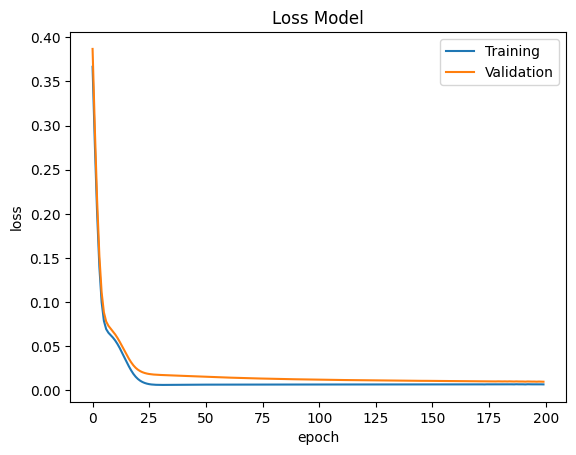

In [ ]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['total_loss'], label='Validation')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Memilih pengguna acak untuk mendapatkan rekomendasi
user_rand = np.random.choice(unique_userIds)
test_rating = {}
for product_id_str in unique_productIds:
    product_id = product_id_lookup[product_id_str]  # Mengonversi ID produk dari string ke integer
    rating = model.ranking_model(tf.convert_to_tensor([user_id_lookup[user_rand]]), tf.convert_to_tensor([product_id]))
    test_rating[product_id_str] = rating.numpy()[0]

print("10 mobil teratas yang direkomendasikan untuk pengguna {}: ".format(user_rand))
for product_id_str, rating in sorted(test_rating.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(product_id_str)


10 mobil teratas yang direkomendasikan untuk pengguna R65: 
MB1017A038
MT1021A049
MB1016M038
MT1021A044
MB1007A019
MB1009M019
MB1017A019
MB1002A015
MB1016M037
MT1021A061


In [ ]:

# Save the model to a TensorFlow SavedModel format
dummy_input = {"id_pengguna": tf.constant([0]), "id_kendaraan": tf.constant([0])}
model(dummy_input)  # Panggil model pada data nyata untuk menentukan bentuk input
model.save('matrix_factorization_model', save_format='tf')

In [ ]:
# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('matrix_factorization_model')
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('matrix_factorization_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been successfully converted to TFLite and saved.")

Model has been successfully converted to TFLite and saved.
